In [2]:
import numpy as np
from PIL import Image
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

In [3]:
image = Image.new("RGB", (100, 100), "white")

for x in range(50):
    for y in range(50):
        image.putpixel((x, y), (0, 0, 0))

image_gray = image.convert("L")

image_array = np.array(image_gray)


In [4]:
sobel_x_kernel = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])

sobel_y_kernel = np.array([[-1, -2, -1],
                            [0, 0, 0],
                            [1, 2, 1]])

laplace_kernel = np.array([[0, 1, 0],
                            [1, -4, 1],
                            [0, 1, 0]])

gaussian_kernel = np.array([[1, 2, 1],
                             [2, 4, 2],
                             [1, 2, 1]]) / 16.0


In [5]:
sobel_x_filtered = convolve(image_array, sobel_x_kernel)
sobel_y_filtered = convolve(image_array, sobel_y_kernel)

laplace_filtered = convolve(image_array, laplace_kernel)

gaussian_filtered = convolve(image_array, gaussian_kernel)


In [6]:
sobel_x_image = Image.fromarray(sobel_x_filtered.astype(np.uint8))
sobel_y_image = Image.fromarray(sobel_y_filtered.astype(np.uint8))
laplace_image = Image.fromarray(laplace_filtered.astype(np.uint8))
gaussian_image = Image.fromarray(gaussian_filtered.astype(np.uint8))


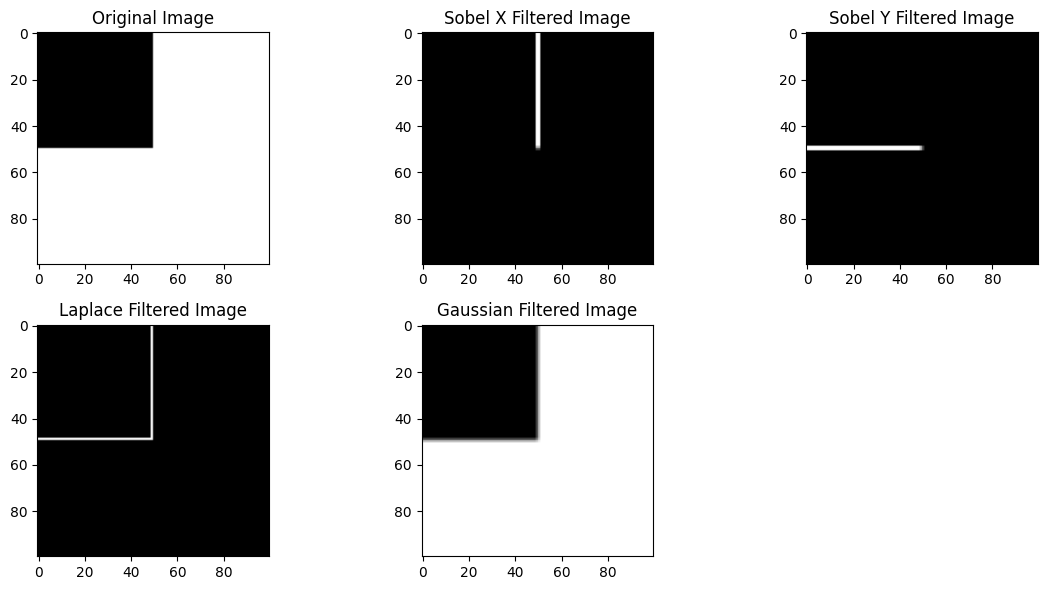

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(sobel_x_image, cmap='gray')
plt.title('Sobel X Filtered Image')

plt.subplot(2, 3, 3)
plt.imshow(sobel_y_image, cmap='gray')
plt.title('Sobel Y Filtered Image')

plt.subplot(2, 3, 4)
plt.imshow(laplace_image, cmap='gray')
plt.title('Laplace Filtered Image')

plt.subplot(2, 3, 5)
plt.imshow(gaussian_image, cmap='gray')
plt.title('Gaussian Filtered Image')

plt.tight_layout()
plt.show()
